<a href="https://colab.research.google.com/github/alifele/Sklearn/blob/master/StandardScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


#About StandardScaler

The main idea is to normalize/standardize (mean = 0 and standard deviation = 1) your features before applying machine learning techniques.

One important thing that you should keep in mind is that most (if not all) scikit-learn models/classes/functions, expect as input a matrix X with dimensions/shape [number_of_samples, number_of_features]. This is very important. Some other libraries expect as input the inverse.

StandardScaler() will normalize the features (each column of X, INDIVIDUALLY) so that each column/feature/variable will have mean = 0 and standard deviation = 1.


#Generating Data

In [0]:
data = np.arange(0,50,1).reshape((25,2))
print(data)


[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]
 [30 31]
 [32 33]
 [34 35]
 [36 37]
 [38 39]
 [40 41]
 [42 43]
 [44 45]
 [46 47]
 [48 49]]


In [0]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-1.66410059 -1.66410059]
 [-1.52542554 -1.52542554]
 [-1.38675049 -1.38675049]
 [-1.24807544 -1.24807544]
 [-1.10940039 -1.10940039]
 [-0.97072534 -0.97072534]
 [-0.83205029 -0.83205029]
 [-0.69337525 -0.69337525]
 [-0.5547002  -0.5547002 ]
 [-0.41602515 -0.41602515]
 [-0.2773501  -0.2773501 ]
 [-0.13867505 -0.13867505]
 [ 0.          0.        ]
 [ 0.13867505  0.13867505]
 [ 0.2773501   0.2773501 ]
 [ 0.41602515  0.41602515]
 [ 0.5547002   0.5547002 ]
 [ 0.69337525  0.69337525]
 [ 0.83205029  0.83205029]
 [ 0.97072534  0.97072534]
 [ 1.10940039  1.10940039]
 [ 1.24807544  1.24807544]
 [ 1.38675049  1.38675049]
 [ 1.52542554  1.52542554]
 [ 1.66410059  1.66410059]]


In [0]:
print('the mean of columns is : {}'.format(scaled_data.mean(axis=0).round(4)))
print('the standarnd derivation of columns is : {}'.format(scaled_data.std(axis=0)))

the mean of columns is : [-0. -0.]
the standarnd derivation of columns is : [1. 1.]


#Scaling Images

some times we use images like the mnist handwriten images to neurish a neural network.
in this case it is highly recommended to scale the images.

But a very important thing to note is that StandardScaler scales the data set in a way each column of the data matrix has mean = 0 and std = 1.
So if you scale the data matrix in the casual way you will mix the pictures to each other!

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests, io

from tensorflow import keras

In [0]:
'''
Let's import the Farsi digits (your assignment)
'''

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

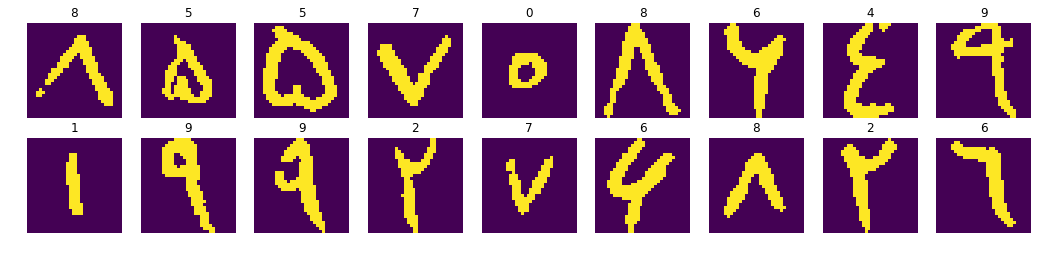

In [0]:
fig = plt.figure(figsize=(18,6))
for i in range(18):
  ax = fig.add_subplot(3,9,i+1, title=y_train[i])
  ax.imshow(X_train[i])
  ax.axis('off')

scaling in the usual way :

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = X_train.reshape(-1,32*32)
#X_train = X_train.T


X_train = scaler.fit_transform(X_train)

#X_train = X_train.T

X_train = X_train.reshape(-1,32,32)


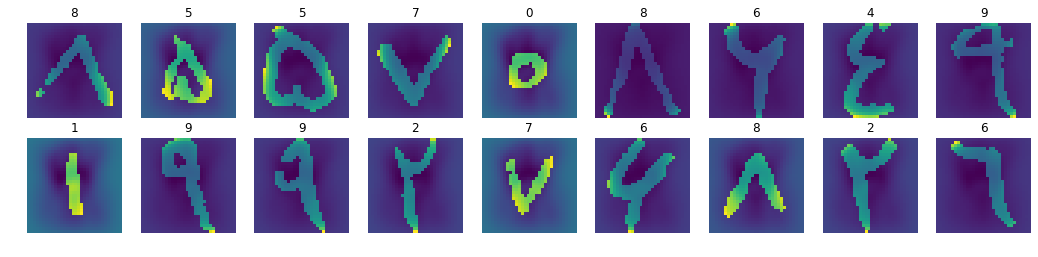

In [0]:
fig = plt.figure(figsize=(18,6))
for i in range(18):
  ax = fig.add_subplot(3,9,i+1, title=y_train[i])
  ax.imshow(X_train[i])
  ax.axis('off')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

scaling with the tricky way

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = X_train.reshape(-1,32*32)
X_train = X_train.T


X_train = scaler.fit_transform(X_train)

X_train = X_train.T

X_train = X_train.reshape(-1,32,32)


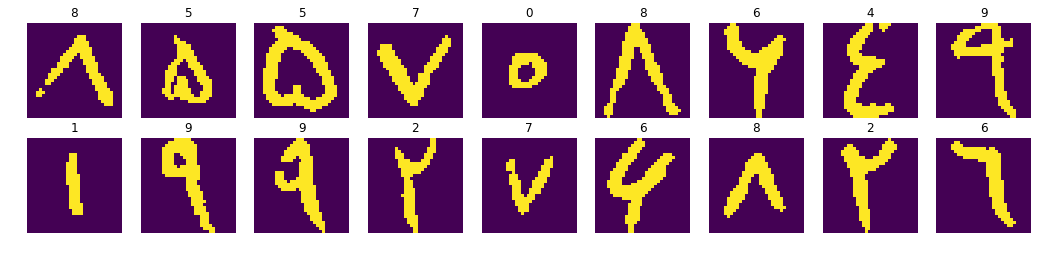

In [0]:
fig = plt.figure(figsize=(18,6))
for i in range(18):
  ax = fig.add_subplot(3,9,i+1, title=y_train[i])
  ax.imshow(X_train[i])
  ax.axis('off')

first by reshaping the data_images_matrix to (-1, height, width) we convert it to traditional data matrix with the (n_sample, n_feature) shape.

the point is in the transposing the matrix.By this line we put the features of individual images under each other in different columns.
If we sclae this data matrix we will be able to sclae each picture individualy.
After scaling we must retranspose it to get the actual shape.
The last step is to reshape the data matrix to data_images_matrix